## 실습. 비용(cost) 최소화하는 회귀모델 구하기

### 예제 데이터 생성

- y=6+4X+noise

In [2]:
import numpy as np

In [12]:
np.random.seed(0)

X = np.random.rand(100,1)
y = 6+4*X + np.random.randn(100,1)

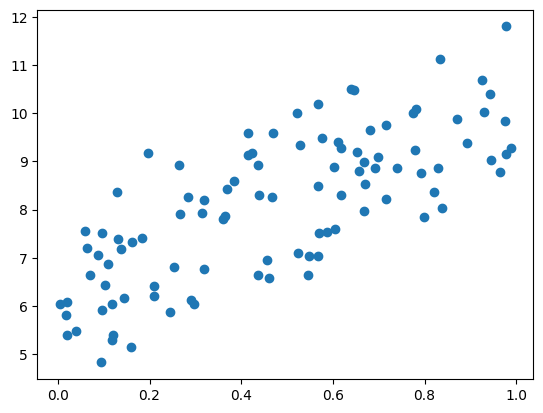

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

### 1. 경사하강법(Gradient Descent)을 이용한 회귀모델 구하기

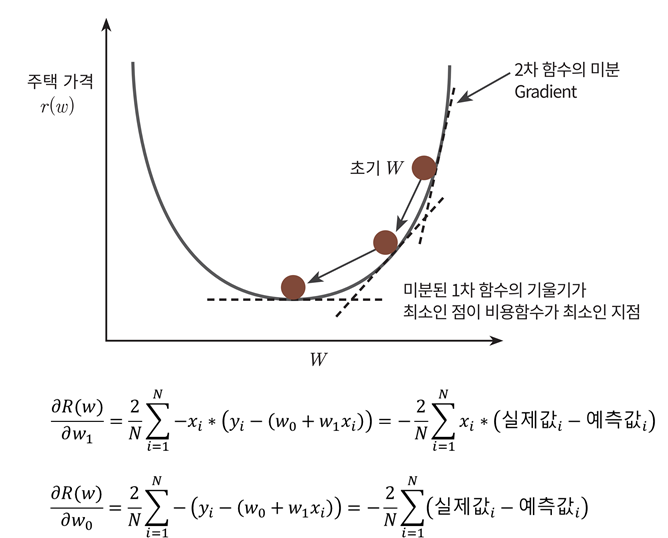

### 경사하강법의 일반적인 프로세스

- [Step1]  $ w_0 , w_1 $를 임의의 값으로 설정하고 첫 비용함수의 값을 계산한다


- [Step2]  $ w_1 $를 $ w_1 + η \frac {2}{N} \sum_{i=1}^N x_i *(실제값_i - 예측값_i ) $ 으로 $ w_0 $를 $ w_0 + η \frac {2}{N} \sum_{i=1}^N (실제값_i - 예측값_i ) $ 으로 업데이트 한 후 다시 비용함수의 값을 계산한다.


- [Step3]  비용함수의 값이 감소했으면 다시 Step2를 반복한다. 더 이상 비용 함수의 값이 감소하지 않으면 그 때의 $ w_1, w_0 $를 구하고 반복을 중지한다.

#### $w_0$과 $w_1$의 값 업데이트 함수 `get_weight_updates()` 정의
- 경사하강법을 적용하여 업데이트

In [23]:
def get_weight_updates(w1,w0, X, y, learning_rate=0.01):
    N  = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    w0_factors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate * np.dot(X.T, diff)
    w0_update = -(2/N)*learning_rate * np.dot(w0_factors.T, diff)
    
    return w1_update, w0_update
    

In [16]:
N, learning_rate  = len(y),0.01
w0, w1 = np.zeros((1,1)), np.zeros((1,1))


y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred

w0_factors = np.ones((N,1))
w1_update = -(2/N)*learning_rate * np.dot(X.T, diff)
w0_update = -(2/N)*learning_rate * np.dot(w0_factors.T, diff)

print(f'w1_update={w1_update}, w0_update={w0_update}')
print(w1_update.shape, w0_update.shape)

w1_update=[[-0.08298126]], w0_update=[[-0.16167019]]
(1, 1) (1, 1)


- 임의의 초기값을 주어 첫번째 w0, w1 계산

#### `gradient_descent_steps()` 함수 정의
- 경사 하강법을 이용
- get_weight_updates()를 호출하여 $w_1$과 $w_0$를 반복적으로 업데이트

In [57]:
weights=[]
def gradient_descent_steps(X, y, iters=1000, step=20,verbose=True):
    w0, w1 = np.zeros((1,1)), np.zeros((1,1))

    for i in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        if i % 20 ==0:
            weights.append((w1,w0))
            print(f'iter={i+1} => \t w1:{w1}, w0:{w0}')
    weights.append((w1,w0))
    print(f'iter={i+1} => \t w1:{w1}, w0:{w0}')
    return w1, w0

#### 예측 오차 비용 계산 함수 `get_cost()` 생성

In [18]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred)) / N
    return cost

#### 경사하강법 실행

In [27]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)

iter=1 => 	 w1:[[0.08298126]], w0:[[0.16167019]]
iter=21 => 	 w1:[[1.37495145]], w0:[[2.67017215]]
iter=41 => 	 w1:[[2.16300795]], w0:[[4.1854016]]
iter=61 => 	 w1:[[2.64590261]], w0:[[5.09952003]]
iter=81 => 	 w1:[[2.94393708]], w0:[[5.64988667]]
iter=101 => 	 w1:[[3.12992984]], w0:[[5.98016452]]
iter=121 => 	 w1:[[3.24795935]], w0:[[6.17730566]]
iter=141 => 	 w1:[[3.32470868]], w0:[[6.29393708]]
iter=161 => 	 w1:[[3.37633195]], w0:[[6.36191009]]
iter=181 => 	 w1:[[3.41261041]], w0:[[6.40050128]]
iter=201 => 	 w1:[[3.43946793]], w0:[[6.42137624]]
iter=221 => 	 w1:[[3.46049354]], w0:[[6.43159395]]
iter=241 => 	 w1:[[3.47786299]], w0:[[6.43542521]]
iter=261 => 	 w1:[[3.49289654]], w0:[[6.43545329]]
iter=281 => 	 w1:[[3.50639653]], w0:[[6.43324012]]
iter=301 => 	 w1:[[3.51885177]], w0:[[6.42972946]]
iter=321 => 	 w1:[[3.53056122]], w0:[[6.42549096]]
iter=341 => 	 w1:[[3.54170881]], w0:[[6.4208679]]
iter=361 => 	 w1:[[3.55240881]], w0:[[6.41606657]]
iter=381 => 	 w1:[[3.56273322]], w0:[[6

In [28]:
w1, w0

(array([[3.77397397]]), array([[6.30473552]]))

#### 경사하강법으로 구한 선형회귀식 시각화

In [33]:
y_pred = w1[0,0]*X + w0[0,0]
print(f'w1 : {w1[0,0]}, w0:{w0[0,0]:.4f}')
print(f'MSE:{get_cost(y, y_pred):.5f}')
print(f'RMSE : {np.sqrt(get_cost(y, y_pred)):.5f}')

w1 : 3.7739739705499162, w0:6.3047
MSE:0.99468
RMSE : 0.99733


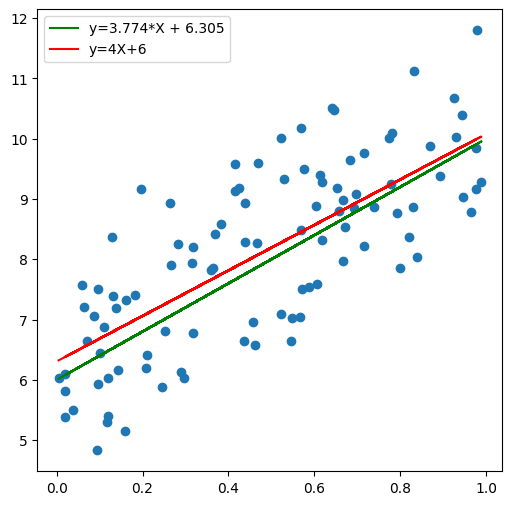

In [45]:
model_str = f'y={w1[0,0]:.3f}*X + {w0[0,0]:.3f}'
org_str = 'y=4X+6'
yo = 4*X+6
plt.figure(figsize=(6,6))
plt.scatter(X,y)
plt.plot(X, yo, 'g', label=model_str)
plt.plot(X, y_pred, 'r', label=org_str)
plt.legend()
plt.show()

In [46]:
weights = []
w1, w0 = gradient_decent_steps(X, y, iters=5000)

NameError: name 'gradient_decent_steps' is not defined

In [50]:

def GD_reg_plot(weights, X, y, step):
    plt.scatter(X,y)
    for i in range(0,len(weights), step):
        w1, w0 = weights[i]
        y_pred = w1[0,0]*X + w0[0,0]
        cost = get_cost(y, y_pred)
        model_str = f'y{i}={w1[0,0]:.3f}*X + {w0[0,0]:.3f}, costL{cost:.4f}'
        plt.plot(X, y_pred, label=model_str)
    plt.legend()
    plt.show()

iter=1 => 	 w1:[[0.08298126]], w0:[[0.16167019]]
iter=21 => 	 w1:[[1.37495145]], w0:[[2.67017215]]
iter=41 => 	 w1:[[2.16300795]], w0:[[4.1854016]]
iter=61 => 	 w1:[[2.64590261]], w0:[[5.09952003]]
iter=81 => 	 w1:[[2.94393708]], w0:[[5.64988667]]
iter=101 => 	 w1:[[3.12992984]], w0:[[5.98016452]]
iter=121 => 	 w1:[[3.24795935]], w0:[[6.17730566]]
iter=141 => 	 w1:[[3.32470868]], w0:[[6.29393708]]
iter=161 => 	 w1:[[3.37633195]], w0:[[6.36191009]]
iter=181 => 	 w1:[[3.41261041]], w0:[[6.40050128]]
iter=201 => 	 w1:[[3.43946793]], w0:[[6.42137624]]
iter=221 => 	 w1:[[3.46049354]], w0:[[6.43159395]]
iter=241 => 	 w1:[[3.47786299]], w0:[[6.43542521]]
iter=261 => 	 w1:[[3.49289654]], w0:[[6.43545329]]
iter=281 => 	 w1:[[3.50639653]], w0:[[6.43324012]]
iter=301 => 	 w1:[[3.51885177]], w0:[[6.42972946]]
iter=321 => 	 w1:[[3.53056122]], w0:[[6.42549096]]
iter=341 => 	 w1:[[3.54170881]], w0:[[6.4208679]]
iter=361 => 	 w1:[[3.55240881]], w0:[[6.41606657]]
iter=381 => 	 w1:[[3.56273322]], w0:[[6

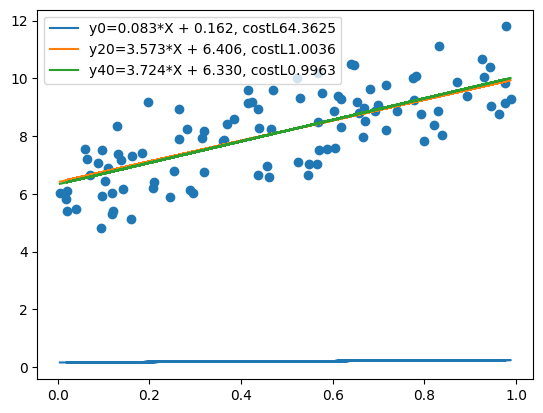

In [62]:
weights = []
iters, stip = 1000, 20
w1, w0 = gradient_descent_steps(X, y, iters=1000, verbose=0)
GD_reg_plot(weights, X, y, 20)

### 2. 미니배치 확률적 경사 하강법(Stochastic Gradient Descent)이용한 회귀모델

**미니 배치 확률적 경사하강법 함수 `stochastic_gradient_descent_steps()` 정의**
- batch_size 만큼 데이터를 랜덤하게 추출하여 이를 기반으로 w1_update, w0_update를 계산

#### 미니배치 경사하강법을 사용한 회귀모델

**확률적 경사하강법으로 계산된 회귀계수를 적용한 회귀직선 시각화**

### 3.  OLS정규방정식을 이용한 회귀계수 추정

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

#### 정규방정식을 사용한 회귀모델 시각화

### 4. 사이킷런의  LinearRegression 클래스 사용

- http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

- RSS(Residual SUm of Squares)를 최소화하는 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스
- fit() 메서드로 X, y 배열을 입력받으면 회귀계수 W를 coef_ , intercept_ 속성에 저장
    - coef_ : 회귀계수 $w_i$ 값들
    - intercept_ : intercept 값 (절편)

#### LinearRegression 객체 생성 및 학습

#### X=1.5248값 예측

#### 회귀계수 coef_ 속성

#### 절편 intecept_ 속성

#### 회귀모델 시각화

#### 경사하강법,OLS정규방정식, 사이킷런 모델 적용한 결과 비교

---------------------------------------------